## Samplers on simple energy functions

In this notebook, we fit a simple Banana energy function using our sampler interface. We plot resulting traces for both `SGHMC` 
and `SGLD` directly on top of the contours of our Banana function 
to visualize our sampling process.

In [78]:
% matplotlib notebook
from itertools import islice
import sys
sys.path.insert(0, "../../../")

import matplotlib.pyplot as plt
import numpy as np
import torch

from pysgmcmc.samplers.sghmc import SGHMC
from pysgmcmc.samplers.sgld import SGLD


def banana_nll(x):
    ll = -(
        0.5 * (0.01 * x[0] ** 2 + 
               (x[1] + 0.1 * x[0] ** 2 - 10) ** 2)
    )
    return -ll

def plot_banana(grid=(np.arange(-25, 25, 0.05),
                      np.arange(-25, 25, 0.05)),):
    x, y = grid
    xx, yy = np.meshgrid(x, y, sparse=True)
    densities = np.asarray([np.exp(-banana_nll((x, y))) for x in xx for y in yy])
    plt.figure()
    plt.contour(x, y, densities, 1)
    plt.xlim(xmin=-30, xmax=30)
    plt.ylim(ymin=-40, ymax=20)
    plt.show()


def plot_samples(sampler_cls=SGHMC, lr=0.1, 
                 num_burn_in_steps=3000,
                 num_samples=1000,
                 color="b"):
    sampler = sampler_cls(params=(torch.rand(1, requires_grad=True), 
                            torch.rand(1, requires_grad=True)),
                          lr=lr, negative_log_likelihood=banana_nll)
    
    # skip burn-in samples
    _ = [sample for sample, _ in islice(sampler, num_burn_in_steps)]
    
    samples = np.asarray([
        sample for sample, _ in islice(sampler, num_samples)
    ])
    plt.scatter(samples[:, 0], samples[:, 1], color=color, label=sampler_cls.__name__)
    plt.legend()

<IPython.core.display.Javascript object>


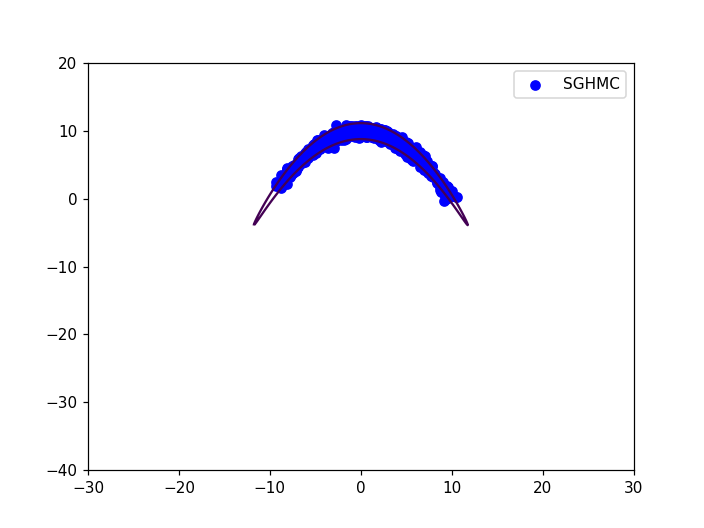

In [79]:
plot_banana()
plot_samples(SGHMC, lr=0.5)

<IPython.core.display.Javascript object>


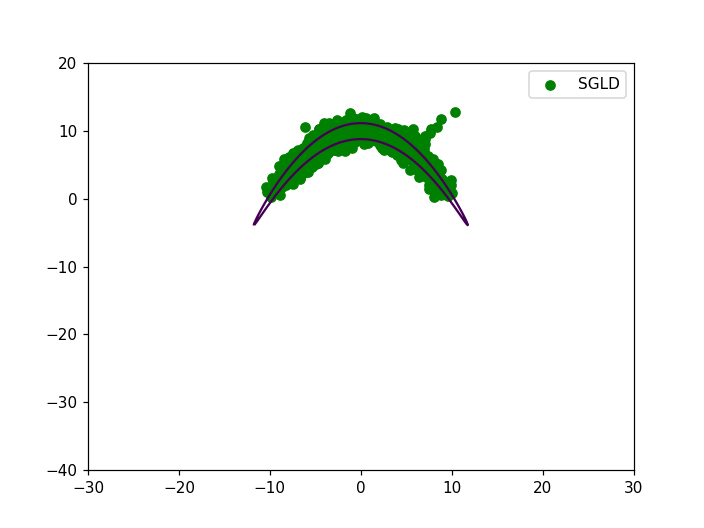

In [80]:
plot_banana()
plot_samples(SGLD, lr=0.5, color="g")